In [7]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [6]:
# Load annotations.csv
annotations_path = 'generated_dataset/annotations.csv'
df = pd.read_csv(annotations_path)

# Define image size
img_size = (40, 40)

# Initialize empty arrays to store images and labels
images = []
labels = []

# Load images and labels from the dataset
for index, row in df.iterrows():
    img_path = os.path.join('generated_dataset', row['Image_Name'])
    label = row['Label']

    # Skip invalid labels
    if not label:
        continue

    # Read and resize the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, img_size)

    # Append image and label to the lists
    images.append(img)
    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values to be between 0 and 1
images = images / 255.0

# Convert labels to one-hot encoding
label_dict = {label: i for i, label in enumerate(np.unique(labels))}
num_classes = len(label_dict)
labels = np.array([label_dict[label] for label in labels])
labels = to_categorical(labels, num_classes=num_classes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


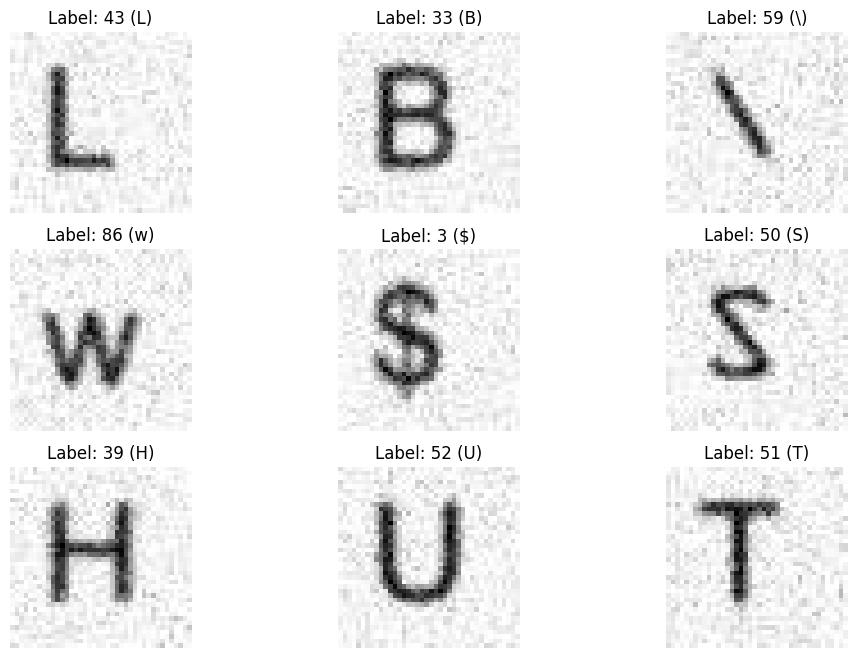

In [11]:
# Display 9 randomly selected training images with annotations
plt.figure(figsize=(12, 8))
random_indices = random.sample(range(len(X_train)), 9)

for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx].reshape(40, 40), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[idx])} ({list(label_dict.keys())[list(label_dict.values()).index(np.argmax(y_train[idx]))]})")
    plt.axis('off')

plt.show()